<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.004732,92.619922,17.711620,163.336274,145.313190,18.023083
1,0.0,1.0,84.682471,99.580115,54.695667,248.958254,188.460221,60.498033
2,0.0,2.0,94.009830,25.960218,-27.208080,102.761968,128.572754,-25.810785
3,0.0,3.0,78.140749,92.517531,-14.215858,166.442421,176.165173,-9.722752
4,0.0,4.0,77.294053,88.722711,18.566094,194.582858,171.909000,22.673858
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,67.325732,56.533478,-21.427498,112.431712,132.609791,-20.178079
249996,999.0,246.0,29.418356,74.175164,21.502669,135.096189,109.091558,26.004630
249997,999.0,247.0,60.719238,36.185159,9.814856,116.719253,105.533893,11.185361
249998,999.0,248.0,69.413830,53.105526,16.197602,148.716957,131.495843,17.221114


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.004732,92.619922,17.711620,163.336274,145.313190,18.023083
1,0.0,1.0,84.682471,99.580115,54.695667,248.958254,188.460221,60.498033
2,0.0,2.0,94.009830,25.960218,-27.208080,102.761968,128.572754,-25.810785
3,0.0,3.0,78.140749,92.517531,-14.215858,166.442421,176.165173,-9.722752
4,0.0,4.0,77.294053,88.722711,18.566094,194.582858,171.909000,22.673858
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,67.325732,56.533478,-21.427498,112.431712,132.609791,-20.178079
249996,999.0,246.0,29.418356,74.175164,21.502669,135.096189,109.091558,26.004630
249997,999.0,247.0,60.719238,36.185159,9.814856,116.719253,105.533893,11.185361
249998,999.0,248.0,69.413830,53.105526,16.197602,148.716957,131.495843,17.221114


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.004732  92.619922  17.711620  163.336274  145.313190   
      1.0    84.682471  99.580115  54.695667  248.958254  188.460221   
      2.0    94.009830  25.960218 -27.208080  102.761968  128.572754   
      3.0    78.140749  92.517531 -14.215858  166.442421  176.165173   
      4.0    77.294053  88.722711  18.566094  194.582858  171.909000   
...                ...        ...        ...         ...         ...   
999.0 245.0  67.325732  56.533478 -21.427498  112.431712  132.609791   
      246.0  29.418356  74.175164  21.502669  135.096189  109.091558   
      247.0  60.719238  36.185159   9.814856  116.719253  105.533893   
      248.0  69.413830  53.105526  16.197602  148.716957  131.495843   
      249.0  75.322372  43.279261  21.364627  149.966260  128.219763   

                 e_hat  
rep   index             
0.0   0.0    18.023083  
      1.0    60.498033  
      2.0   -25.810785  
      3.0    -9.722752  
      4.0    22.673858  
...                ...  
999.0 245.0 -20.178079  
      246.0  26.004630  
      247.0  11.185361  
      248.0  17.221114  
      249.0  21.746498  

[250000 rows x 6 columns]

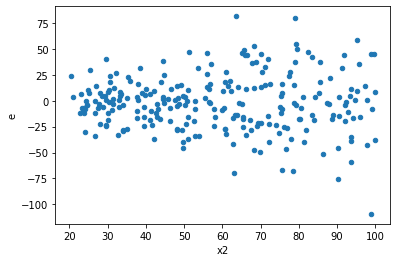

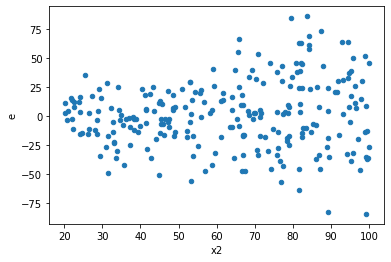

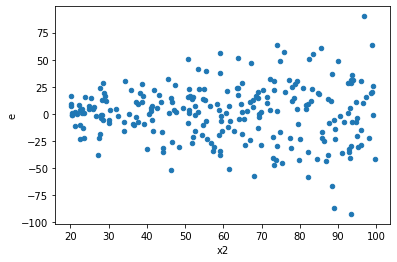

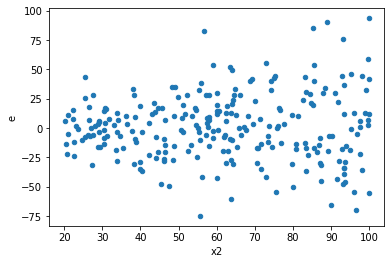

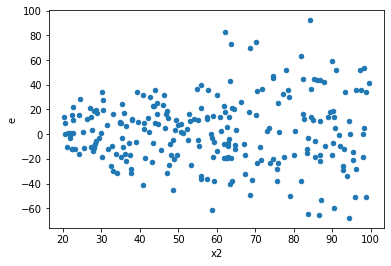

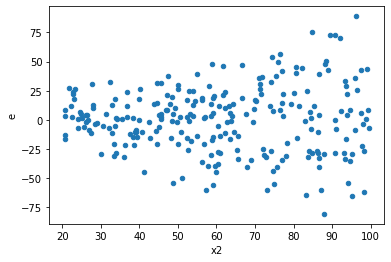

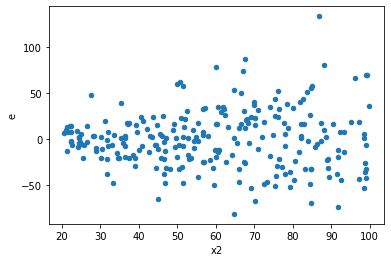

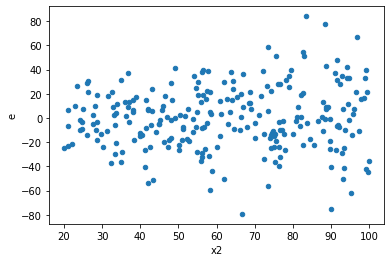

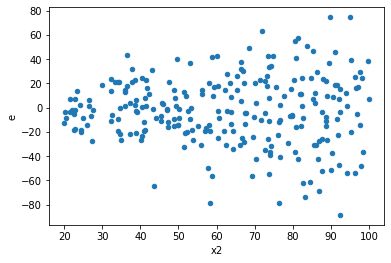

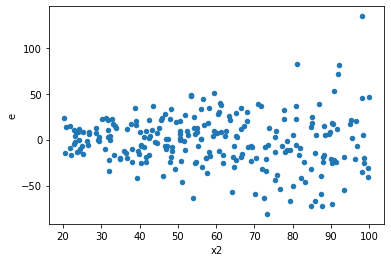

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,130.0,116.0,79810.85378665307,126341.8034957203,613.9296445127159,1089.153478411382,1.7740688825604072,0.001771649968302036,0.999114175015849,0.000885824984151018,Reject005=0 : Heteroscedasticity
2.0,126.0,120.0,77140.49122700751,116064.030315504,612.226120849266,967.2002526292,1.579808864227358,0.011970240775146523,0.9940148796124267,0.005985120387573262,Reject005=0 : Heteroscedasticity
5.0,104.0,142.0,35711.96801196676,97341.08841845296,343.3843078073727,685.5006226651617,1.9963073648948018,0.0001338342542192006,0.9999330828728904,6.69171271096003e-05,Reject005=0 : Heteroscedasticity
7.0,108.0,138.0,52519.24350295718,121885.95459057388,486.28929169404796,883.2315550041585,1.816267744509269,0.0009634987972124698,0.9995182506013938,0.0004817493986062349,Reject005=0 : Heteroscedasticity
11.0,121.0,125.0,62392.52095698291,144261.73491383198,515.6406690659744,1154.093879310656,2.2381746602748933,1.0329845027134965e-05,0.9999948350774864,5.1649225135674826e-06,Reject005=0 : Heteroscedasticity
14.0,119.0,127.0,59831.76915095872,124038.05098549962,502.7879760584766,976.6775668149577,1.9425237144123062,0.0002576684155488618,0.9998711657922256,0.0001288342077744309,Reject005=0 : Heteroscedasticity
16.0,124.0,122.0,71048.77995420167,163294.52573989326,572.9740318887232,1338.479719179453,2.33602160776354,3.8001105846507954e-06,0.9999980999447077,1.9000552923253977e-06,Reject005=0 : Heteroscedasticity
18.0,120.0,126.0,63061.98533763652,128789.77414521373,525.5165444803043,1022.1410646445534,1.9450216655983166,0.00025359266364777255,0.9998732036681761,0.00012679633182388628,Reject005=0 : Heteroscedasticity
20.0,118.0,128.0,53827.799357043725,133199.66610463377,456.16779116138747,1040.6223914424513,2.281227240513984,6.042103992243142e-06,0.9999969789480039,3.021051996121571e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,130.0,116.0,79810.85378665307,126341.8034957203,613.9296445127159,1089.153478411382,1.7740688825604072,0.001771649968302036,Reject005=0 : Heteroscedasticity
1.0,117.0,129.0,109154.1548711623,55652.117865999535,932.9414946253188,431.41176640309715,0.46242102949484265,2.8648294194861212e-05,Reject005=0 : Heteroscedasticity
2.0,126.0,120.0,77140.49122700751,116064.030315504,612.226120849266,967.2002526292,1.579808864227358,0.011970240775146523,Reject005=0 : Heteroscedasticity
3.0,126.0,120.0,104137.27371637445,67155.82898652644,826.4862993363051,559.6319082210537,0.6771218212213027,0.03114755146268342,Reject005=0 : Heteroscedasticity
4.0,139.0,107.0,134851.73592695984,52450.87259121008,970.1563735752507,490.1950709458886,0.5052742880401913,0.00016129813940050545,Reject005=0 : Heteroscedasticity
5.0,104.0,142.0,35711.96801196676,97341.08841845296,343.3843078073727,685.5006226651617,1.9963073648948018,0.0001338342542192006,Reject005=0 : Heteroscedasticity
6.0,130.0,116.0,133525.17960814905,50980.12315752892,1027.1167662165312,439.48382032352515,0.4278810693962283,3.126594946140543e-06,Reject005=0 : Heteroscedasticity
7.0,108.0,138.0,52519.24350295718,121885.95459057388,486.28929169404796,883.2315550041585,1.816267744509269,0.0009634987972124698,Reject005=0 : Heteroscedasticity
8.0,133.0,113.0,133951.46338809736,53113.24414575708,1007.1538600608824,470.02870925448747,0.46669007377489896,2.652829911676665e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    924
Reject005=1 : Homoscedasticity       76
Name: Result_test, dtype: int64